Input from 10x Xenium_Prime_Human_Lymph_Node_Reactive_FFPE
```
analysis_summary.html
analysis.zarr.zip
cell_feature_matrix.zarr.zip
cells.zarr.zip
experiment.xenium
gene_panel.json
morphology_focus
transcripts.zarr.zip
```

| File type                                | File and description                                                                                                                                                                         | Read in Xenium Explorer |
|------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|-------------------------|
| **Experiment file**                      | `experiment.xenium`: Experiment manifest file.                                                                                                                                               | Required                |
| **Interactive summary**                  | `analysis_summary.html`: Summary metrics, graphs, and images to QC your run data in HTML format.                                                                                              |                         |
| **Image files**                          | `morphology.ome.tif`: The 3D nuclei-stained (DAPI) morphology image in OME-TIFF format.                                                                                                       |                         |
|                                          | `morphology_focus/`: A directory containing the multi-focus projection of morphology image(s) in a multi-file OME-TIFF format (2D). The directory will contain the nuclei DAPI stain image, as well as three additional stain images for Xenium outputs generated with the multimodal cell segmentation assay workflow. |                         |
| **Cell summary**                         | `cells.csv.gz`: Cell summary file.                                                                                                                                                           |                         |
|                                          | `cells.parquet`: Cell summary file in Parquet format.                                                                                                                                        |                         |
| **Cell segmentation masks and polygons** | `cells.zarr.zip`: Cell summary file in zipped Zarr format, only file that contains the nucleus and cell segmentation masks and boundaries used for transcript assignment.                     |                         |
| **Cell boundary polygons**               | `cell_boundaries.csv.gz`: Cell boundary file.                                                                                                                                                |                         |
|                                          | `cell_boundaries.parquet`: Cell boundary file in Parquet format.                                                                                                                             |                         |
| **Nucleus boundary polygons**            | `nucleus_boundaries.csv.gz`: Nucleus boundary file.                                                                                                                                          |                         |
|                                          | `nucleus_boundaries.parquet`: Nucleus boundary file in Parquet format.                                                                                                                       |                         |
| **Transcript data**                      | `transcripts.parquet`: Transcripts data in Parquet format.                                                                                                                                   |                         |
|                                          | `transcripts.zarr.zip`: Transcript data in zipped Zarr format.                                                                                                                               |                         |
| **Cell-feature matrix**                  | `cell_feature_matrix/`: Directory of the cell-feature matrix files in Market Exchange format.                                                                                                |                         |
|                                          | `cell_feature_matrix.h5`: Cell-feature matrix file in HDF5 format.                                                                                                                           |                         |
|                                          | `cell_feature_matrix.zarr.zip`: Cell-feature matrix file in zipped Zarr format.                                                                                                              |                         |
| **Metric summary**                       | `metrics_summary.csv`: Summary of key metrics.                                                                                                                                               |                         |
| **Secondary analysis**                   | `analysis/`: Directory of secondary analysis results.                                                                                                                                        |                         |
|                                          | `analysis.zarr.zip`: Secondary analysis outputs in zipped Zarr format.                                                                                                                       |                         |
| **Gene panel**                           | `gene_panel.json`: Copy of input gene panel file.                                                                                                                                            |                         |
| **Auxiliary data (aux_outputs/)**        | `morphology_fov_locations.json`: Field of view (FOV) name and position information (in microns).                                                                                             |                         |
|                                          | `overview_scan_fov_locations.json`: FOV name and position information (in pixels).                                                                                                           |                         |
|                                          | `per_cycle_channel_images/`: Directory of downsampled RNA image files in TIFF format from each cycle and channel.                                                                             |                         |
|                                          | `overview_scan.png`: Full resolution image of entire slide sample.                                                                                                                           |                         |
|                                          | `background_qc_images/`: Directory of autofluorescence images in TIFF format that correspond to morphology_focus/ images if generated.                                                        |                         |


Here is the code translate from **stLearn** ```ReadXenium``` function, where the corsponding 10X xenium file is downloaded from the 10x website:

```python
metadata = pd.read_csv(cell_summary_file)
spatial = metadata[["x_centroid", "y_centroid"]]
spatial.columns = ["imagecol", "imagerow"]
````

cell_summary_file -> cells.zarr.zip

```python
adata = scanpy.read_10x_h5(feature_cell_matrix_file)
adata.obsm["spatial"] = spatial.values
```

feature_cell_matrix_file -> cell_feature_matrix.zarr.zip

**Stracture of andata**
AnnData object with n_obs × n_vars = 21445 × 6350
- **obs**: `'in_tissue'`, `'array_row'`, `'array_col'`, `'n_counts'`, `'n_genes'`, `'sum'`, `'detected'`, `'subsets_mito_sum'`, `'subsets_mito_detected'`, `'subsets_mito_percent'`, `'cluster'`
- **var**: `'gene_ids'`, `'feature_types'`, `'genome'`, `'n_counts'`, `'highly_variable'`
- **uns**: `'spatial'`, `'config'`, `'pca'`, `'neighbors'`, `'leiden'`
- **obsm**: `'spatial'`, `'geometry'`, `'X_pca'`
- **varm**: `'PCs'`
- **layers**: `'counts'`, `'logcounts'`
- **obsp**: `'distances'`, `'connectivities'`


<ceneter>Multi-file OME-TIFF images<center>

In [9]:
import tifffile
import matplotlib.pyplot as plt
import os
import seaborn as sns

path_morphology_focus ="/data/kanferg/Sptial_Omics/playGround/Data/Xenium/Xenium_Prime_Human_Lymph_Node_Reactive_FFPE/morphology_focus"
file_name = "morphology_focus_0000.ome.tif"
file_path = os.path.join(path_morphology_focus, file_name)

# Option 1: Load full resolution image channels
# The following may produce a warning: 'OME series cannot read multi-file pyramids'. This is because tifffile does not support loading a pyramidal multi-file OME-TIFF file. Only the full resolution (level=0) data will load for all channels in the directory.
fullres_multich_img = tifffile.imread(file_path, is_ome=True, level=0, aszarr=False)

# Examine shape of array (number of channels, height, width), e.g. (4, 34119, 39776)
fullres_multich_img.shape

<tifffile.TiffFile 'morphology_focus_0000.ome.tif'> OME series cannot read multi-file pyramids


(4, 34119, 39776)

In [10]:
section = fullres_multich_img[0,25000:28000,25000:28000]
section,section.shape

(array([[1175, 1012,  998, ..., 2065, 2124, 2353],
        [1239, 1006,  945, ..., 2376, 2346, 2443],
        [1286, 1015,  898, ..., 2802, 2711, 2719],
        ...,
        [1252, 1190, 1188, ..., 2802, 2705, 2632],
        [1176, 1150, 1130, ..., 2630, 2573, 2543],
        [1108, 1105, 1123, ..., 2526, 2492, 2401]], dtype=uint16),
 (3000, 3000))

In [11]:
from skimage import io, filters, measure, color, img_as_ubyte
section_ubyte = img_as_ubyte(section)

<Axes: ylabel='Count'>

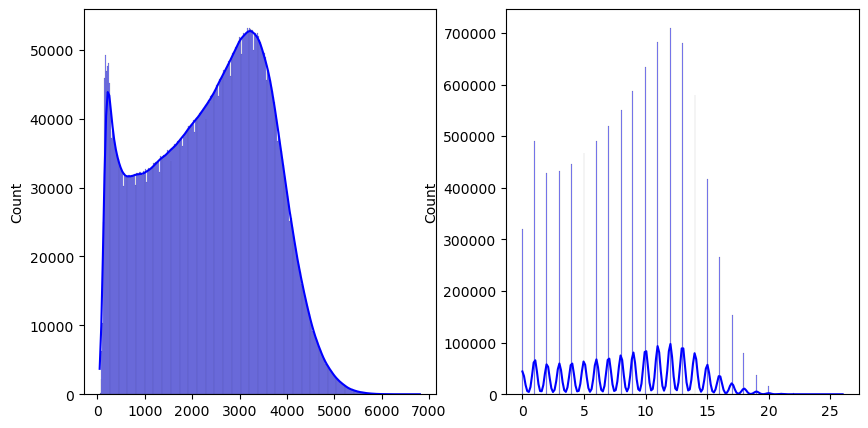

In [17]:
import seaborn as sns
fig, axes = plt.subplots(1, 2,figsize=(10, 5))
axes = axes.ravel()
sns.histplot(x = section.ravel(),  color="blue",ax = axes[0],kde = True)
sns.histplot(x = section_ubyte.ravel(),  color="blue",ax = axes[1],kde = True)

In [18]:
from skimage.transform import rescale, resize, downscale_local_mean
image_resized = resize(section_ubyte, (section_ubyte.shape[0] // 10, section_ubyte.shape[1] // 10), anti_aliasing=True)

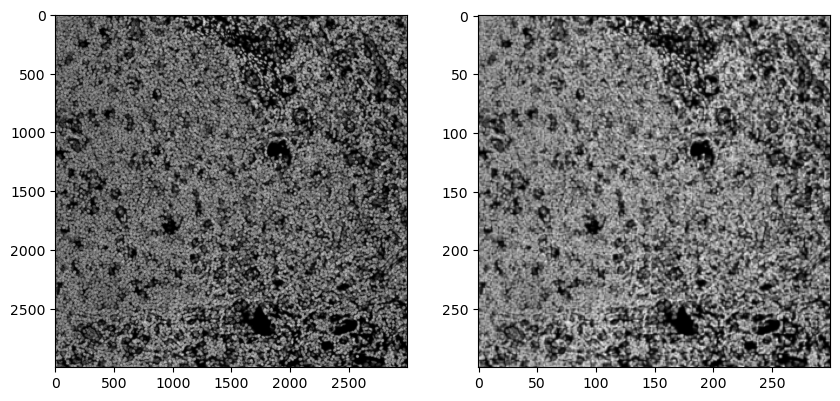

In [20]:
fig, axes = plt.subplots(1, 2,figsize=(10, 5))
axes[0].imshow(section_ubyte, cmap='gray')
axes[1].imshow(image_resized, cmap='gray')

In [21]:
fullres_multich_img_0 = fullres_multich_img[0,:,:]

In [22]:
image_resized = resize(fullres_multich_img_0, (fullres_multich_img_0.shape[0] // 10, fullres_multich_img_0.shape[1] // 10), anti_aliasing=True)

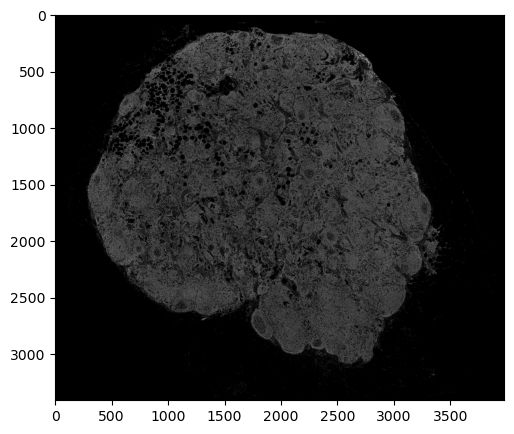

In [44]:
fig, axes = plt.subplots(1, 1,figsize=(10, 5))
axes.imshow(image_resized, cmap='gray')


<Axes: ylabel='Count'>

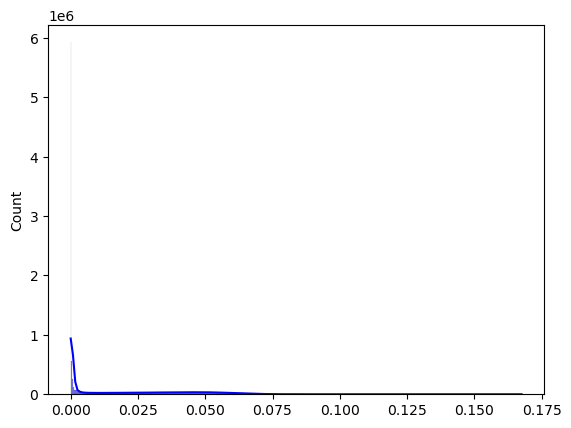

In [47]:
sns.histplot(x = image_resized.ravel(),  color="blue",kde = True)

In [35]:
import numpy as np

<Axes: ylabel='Count'>

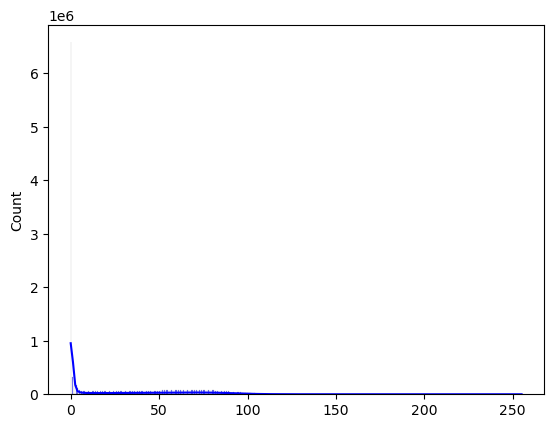

In [52]:
image_scaled = ((image_resized /image_resized.max())  * 255).astype(np.uint8)
sns.histplot(x = image_scaled.ravel(),  color="blue",kde = True)

In [53]:
skimage.io.imsave(os.path.join(path_morphology_focus, 'test.png'), image_scaled)

<center><B><H2>cells.zarr.zip </center>

In [1]:
import zarr
import numpy as np
import seaborn as sns
from skimage import io, filters, measure, color, img_as_ubyte
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.pyplot as plt

In [2]:
# Function to open a Zarr file
def open_zarr(path: str) -> zarr.Group:
    store = (zarr.ZipStore(path, mode="r")
    if path.endswith(".zip")
    else zarr.DirectoryStore(path)
    )
    return zarr.group(store=store)

In [9]:
path = "/data/kanferg/Sptial_Omics/playGround/Data/Xenium/Xenium_Prime_Human_Lymph_Node_Reactive_FFPE/cells.zarr.zip"

In [4]:
root = open_zarr(path)

# Look at group array info and structure
root.info
root.tree() # shows structure, array dimensions, data types


Tree(nodes=(Node(disabled=True, name='/', nodes=(Node(disabled=True, icon='table', name='cell_id (708983, 2) u…

In [5]:
cellseg_mask = np.array(root["masks"][1])
nucseg_mask = np.array(root["masks"][0])

In [7]:
nucseg_mask.shape, nucseg_mask.dtype

((34119, 39776), dtype('uint32'))

In [19]:
def process_seg(img,scale):
    image_resized = resize(img, (img.shape[0] // 10, img.shape[1] // 10), anti_aliasing=True)
    image_scaled = ((image_resized /image_resized.max())  * 255).astype(np.uint8)
    return image_scaled

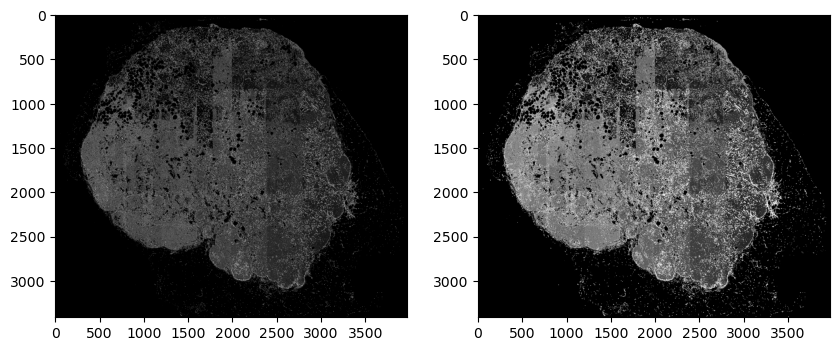

In [21]:
fig, axes = plt.subplots(1, 2,figsize=(10, 5))
axes[0].imshow(process_seg(img = nucseg_mask, scale = 10), cmap='gray')
axes[1].imshow(process_seg(img = cellseg_mask, scale = 10), cmap='gray')

In [28]:
# Examples for exploring file contents
# How to show array
root["masks"][0][0:9].shape # or root["masks/0"]

(9, 39776)

In [31]:
root["cell_summary"].shape

(708983, 8)

In [32]:
root.attrs["major_version"]

6

In [33]:
root.attrs["segmentation_methods"]

['Segmented by boundary stain (ATP1A1+CD45+E-Cadherin)',
 'Segmented by interior stain (18S)',
 'Segmented by nucleus expansion of 5.0µm',
 'Segmented by nuclear stain (DAPI)']

In [34]:
dict(root.attrs.items())

{'major_version': 6,
 'minor_version': 2,
 'name': 'CellSegmentationDataset',
 'number_cells': 708983,
 'polygon_set_descriptions': ['DAPI-based nuclei segmentation',
  'Cell Segmentation'],
 'polygon_set_display_names': ['Nucleus boundaries', 'Cell boundaries'],
 'polygon_set_names': ['nucleus', 'cell'],
 'segmentation_methods': ['Segmented by boundary stain (ATP1A1+CD45+E-Cadherin)',
  'Segmented by interior stain (18S)',
  'Segmented by nucleus expansion of 5.0µm',
  'Segmented by nuclear stain (DAPI)'],
 'spatial_units': 'microns'}

In [35]:
dict(root['cell_summary'].attrs.items())

{'column_descriptions': ['Cell centroid in X',
  'Cell centroid in Y',
  'Cell area',
  'Nucleus centroid in X',
  'Nucleus centroid in Y',
  'Nucleus area',
  'z_level',
  'Nucleus count'],
 'column_names': ['cell_centroid_x',
  'cell_centroid_y',
  'cell_area',
  'nucleus_centroid_x',
  'nucleus_centroid_y',
  'nucleus_area',
  'z_level',
  'nucleus_count']}

<center><B><H2>analysis.zarr.zip</center>

In [36]:
path = "/data/kanferg/Sptial_Omics/playGround/Data/Xenium/Xenium_Prime_Human_Lymph_Node_Reactive_FFPE/analysis.zarr.zip"
# Read in secondary analysis Zarr arrays
root = open_zarr(path)
# Examples for exploring file contents
# How to show a slice of the clustering_index arrays
root["cell_groups"][0]["indices"][0:9]


array([10, 13, 16, 22, 32, 40, 42, 43, 44], dtype=uint32)

In [37]:
# How to show attributes
root["cell_groups"].attrs["group_names"]

[['Cluster 1',
  'Cluster 2',
  'Cluster 3',
  'Cluster 4',
  'Cluster 5',
  'Cluster 6',
  'Cluster 7',
  'Cluster 8',
  'Cluster 9',
  'Cluster 10',
  'Cluster 11',
  'Cluster 12',
  'Cluster 13',
  'Cluster 14',
  'Cluster 15',
  'Cluster 16',
  'Cluster 17',
  'Cluster 18',
  'Cluster 19',
  'Cluster 20',
  'Cluster 21',
  'Cluster 22',
  'Cluster 23',
  'Cluster 24',
  'Cluster 25',
  'Cluster 26',
  'Cluster 27',
  'Cluster 28',
  'Cluster 29',
  'Cluster 30',
  'Cluster 31',
  'Cluster 32',
  'Cluster 33',
  'Cluster 34',
  'Cluster 35'],
 ['Cluster 1', 'Cluster 2'],
 ['Cluster 1', 'Cluster 2', 'Cluster 3'],
 ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'],
 ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'],
 ['Cluster 1',
  'Cluster 2',
  'Cluster 3',
  'Cluster 4',
  'Cluster 5',
  'Cluster 6'],
 ['Cluster 1',
  'Cluster 2',
  'Cluster 3',
  'Cluster 4',
  'Cluster 5',
  'Cluster 6',
  'Cluster 7'],
 ['Cluster 1',
  'Cluster 2',
  'Cluster 3',
  'Cluster 4

<center><B><H2>transcripts.zarr.zip</center>

In [39]:
path = "/data/kanferg/Sptial_Omics/playGround/Data/Xenium/Xenium_Prime_Human_Lymph_Node_Reactive_FFPE/transcripts.zarr.zip"
# Read in secondary analysis Zarr arrays
root = open_zarr(path)

In [42]:
root.info
root.tree() # shows structure, array dimensions, data types

Tree(nodes=(Node(disabled=True, name='/', nodes=(Node(disabled=True, icon='table', name='codeword_category (19…

In [44]:
# Examples for exploring file contents
# How to show array info
root['grids'][0]['0,10']['gene_identity'].shape

(44, 1)

In [45]:
root['grids'][0]['0,10']['quality_score'][0:7]

array([[23.],
       [40.],
       [40.],
       [40.],
       [40.],
       [40.],
       [40.]], dtype=float32)

In [43]:
root['grids'][0]['0,0']['quality_score'][0:9]
root['grids'][0]['0,0']['location'][0:9,]
# How to show array attributes
root.attrs['major_version']
root['density']['gene'].attrs['gene_names'][0:9]

KeyError: '0,0'

<center><B><H2>cell_feature_matrix.zarr.zip</center>

In [46]:
path = "/data/kanferg/Sptial_Omics/playGround/Data/Xenium/Xenium_Prime_Human_Lymph_Node_Reactive_FFPE/cell_feature_matrix.zarr.zip"
# Read in secondary analysis Zarr arrays
root = open_zarr(path)
root.info
root.tree() # shows structure, array dimensions, data types

Tree(nodes=(Node(disabled=True, name='/', nodes=(Node(disabled=True, name='cell_features', nodes=(Node(disable…

In [52]:
np.array(root['cell_features']['data']).shape

(157829388,)

<center><B><H2>gene_panel.json</center>

In [1]:
# Import Python libraries
# Example with python v3.12, pandas v2.1.1
import json
import pandas as pd

# Open JSON file
path = "/data/kanferg/Sptial_Omics/playGround/Data/Xenium/Xenium_Prime_Human_Lymph_Node_Reactive_FFPE/gene_panel.json"
f = open(path) # Edit file name here

# Return JSON object as a dictionary
data = json.load(f)

# Create lists to store extracted information
gene = []
ensembl = []
cov = []
# Iterate through the JSON list to extract information
for i in data['payload']['targets']:
    if (i['type']['descriptor'] == "gene"): # Only collect info for genes, not controls
        gene_name = i['type']['data']['name']
        ensembl_id = i['type']['data']['id']
        coverage = str(i['info']['gene_coverage'])

        gene.append(gene_name)
        ensembl.append(ensembl_id)
        cov.append(coverage)

# Create output CSV file
out_df = pd.DataFrame(list(zip(gene, ensembl, cov)), columns=['Gene name', 'Ensembl ID', 'Gene coverage'])



In [2]:
out_df

,Gene name,Ensembl ID,Gene coverage
0,A2ML1,ENSG00000166535,2
1,AAMP,ENSG00000127837,3
2,AAR2,ENSG00000131043,3
3,AARSD1,ENSG00000266967,3
4,ABAT,ENSG00000183044,3
...,...,...,...
4620,ZSCAN26,ENSG00000197062,3
4621,ZSWIM6,ENSG00000130449,2
4622,ZUP1,ENSG00000153975,3
4623,ZYG11B,ENSG00000162378,2


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import ListedColormap
import matplotlib.ticker as ticker
import seaborn as sns
import os
import gzip
import numpy as np
import scanpy as sc
import squidpy as sq
import voyagerpy as vp
from leidenalg import ModularityVertexPartition
import geopandas as gpd
from collections import OrderedDict
from scipy.sparse import csr_matrix

import zarr


In [2]:
adata = sc.read_10x_h5("/data/kanferg/Sptial_Omics/playGround/Data/Xenium/output_temp/cell_feature_matrix.h5")

In [13]:
adata.var

,gene_ids,feature_types,genome
A2ML1,ENSG00000166535,Gene Expression,Unknown
AAMP,ENSG00000127837,Gene Expression,Unknown
AAR2,ENSG00000131043,Gene Expression,Unknown
AARSD1,ENSG00000266967,Gene Expression,Unknown
ABAT,ENSG00000183044,Gene Expression,Unknown
...,...,...,...
ZSCAN26,ENSG00000197062,Gene Expression,Unknown
ZSWIM6,ENSG00000130449,Gene Expression,Unknown
ZUP1,ENSG00000153975,Gene Expression,Unknown
ZYG11B,ENSG00000162378,Gene Expression,Unknown


In [14]:
adata.obs

""
aaaaadoa-1
aaaaclhf-1
aaaafcfj-1
aaaagamp-1
aaaaiako-1
...
oikoinno-1
oikojopg-1
oikokaeg-1
oikooakd-1


In [15]:
# Function to open a Zarr file
def open_zarr(path: str) -> zarr.Group:
    store = (zarr.ZipStore(path, mode="r")
    if path.endswith(".zip")
    else zarr.DirectoryStore(path)
    )
    return zarr.group(store=store)
path = "/data/kanferg/Sptial_Omics/playGround/Data/Xenium/output_temp/cells.zarr.zip"
root = open_zarr(path)

In [16]:
np.array(root["cell_summary"]).shape

(708983, 8)

In [17]:
dict(root['cell_summary'].attrs.items())['column_names']

['cell_centroid_x',
 'cell_centroid_y',
 'cell_area',
 'nucleus_centroid_x',
 'nucleus_centroid_y',
 'nucleus_area',
 'z_level',
 'nucleus_count']

In [18]:
column_names = dict(root['cell_summary'].attrs.items())['column_names']
def build_obs(andata,root,column_names):
    for i in range(len(column_names)):
        andata.obs[str(column_names[i])] = np.array(root["cell_summary"])[:,i]
    spatial = andata.obs[["cell_centroid_x", "cell_centroid_y"]]
    adata.obsm["spatial"] = spatial.values
    return andata
andata = build_obs(adata,root,column_names)
andata

AnnData object with n_obs × n_vars = 708983 × 4624
    obs: 'cell_centroid_x', 'cell_centroid_y', 'cell_area', 'nucleus_centroid_x', 'nucleus_centroid_y', 'nucleus_area', 'z_level', 'nucleus_count'
    var: 'gene_ids', 'feature_types', 'genome'
    obsm: 'spatial'

In [19]:
andata.var_names_make_unique()
andata.obsm['spatial'] = np.array(andata.obsm['spatial'], dtype=np.float64)
# andata.uns['spatial']['img'] = andata.uns['spatial'][self.dataset_key].pop("images")
# andata.uns['spatial']['scale'] = andata.uns['spatial'][self.dataset_key].pop("scalefactors")
# andata.uns['spatial']['metadata'] = andata.uns['spatial'][self.dataset_key].pop("metadata")
# andata.uns['spatial'].pop(self.dataset_key)
is_mt = andata.var_names.str.startswith('mt')
vp.utils.add_per_cell_qcmetrics(andata, subsets={'mito': is_mt})

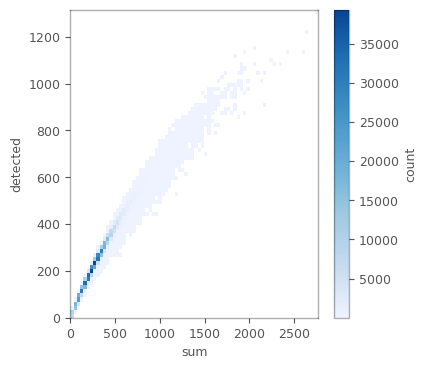

In [58]:
ax = vp.plotting.plot_barcodes_bin2d(
    andata,
    x='sum',
    y='detected',
    bins=76,
    figsize=(4, 4)
)

<Axes: xlabel='detected', ylabel='Count'>

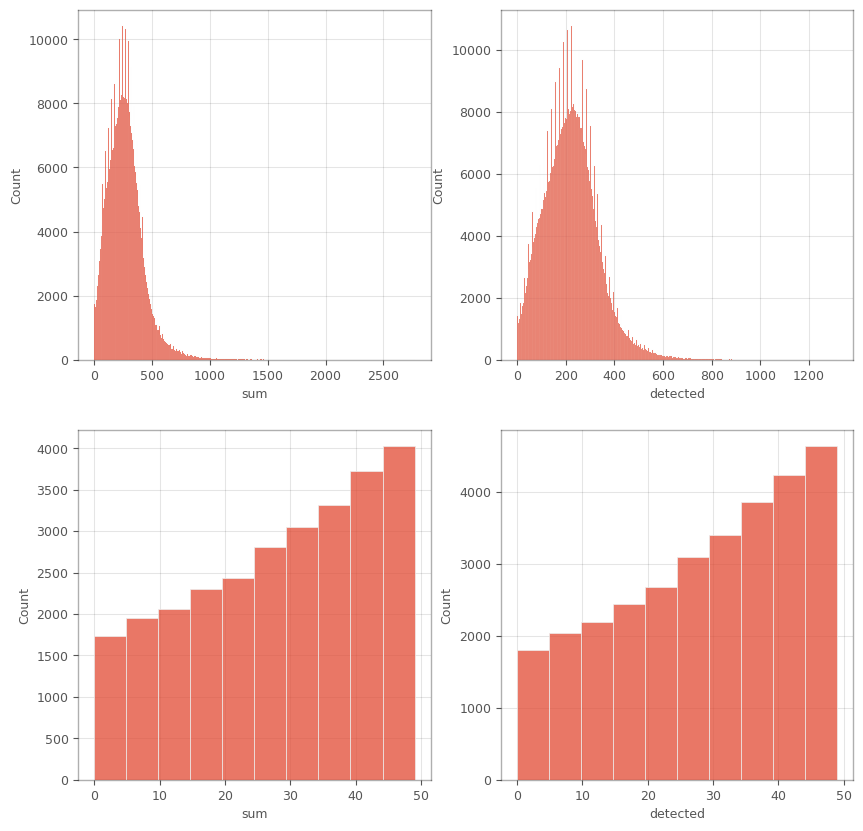

In [63]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()
sns.histplot(andata.obs["sum"], kde=False, ax=axs[0])
sns.histplot(andata.obs["detected"], kde=False, ax=axs[1])
sns.histplot(andata.obs["sum"][andata.obs["sum"]<50],binwidth= 5, kde=False, ax=axs[2])
sns.histplot(andata.obs["detected"][andata.obs["detected"]<50],binwidth= 5, kde=False, ax=axs[3])

In [20]:
sc.pp.filter_cells(andata, min_counts=10)
sc.pp.filter_cells(andata, min_genes=10)

In [21]:
andata.uns = {"spatial":{"scale":1}}

In [22]:
andata.uns['config'] = OrderedDict()
andata.uns["config"]["secondary_var_names"] = andata.var_names
scale = 1

In [23]:
visium_spots = gpd.GeoSeries.from_xy(andata.obsm['spatial'][:,0], andata.obsm['spatial'][:,1]).scale(scale, scale, origin=(0, 0))

In [24]:
_ = vp.spatial.set_geometry(andata, geom="spot_poly", values=visium_spots)

In [25]:
andata.layers['counts'] = andata.X.copy()
# Log-normalize the adata.X matrix
vp.utils.log_norm_counts(andata, inplace=True)
andata.layers['logcounts'] = andata.X.copy()
andata.obs['var'] = np.var(andata.X.todense(), axis=1)


In [26]:
gene_var = vp.utils.model_gene_var(andata.layers['logcounts'], gene_names = andata.var_names)
hvgs = vp.utils.get_top_hvgs(gene_var)

In [27]:
andata.var['highly_variable'] = False
andata.var.loc[hvgs, 'highly_variable'] = True
andata.X = vp.utils.scale(andata.X, center=True)
sc.tl.pca(andata, use_highly_variable=True, n_comps=30, random_state=1337)

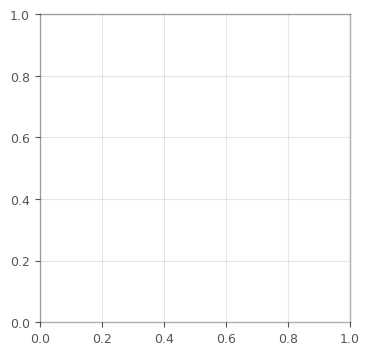

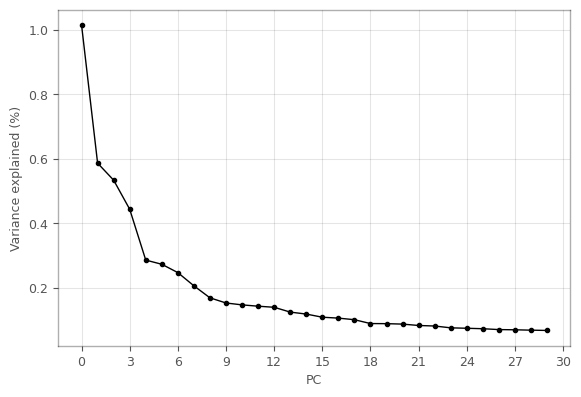

In [28]:
fig, axs = plt.subplots(1, 1, figsize=(4, 4))
vp.plt.elbow_plot(andata, ndims=30)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

In [29]:
sc.tl.pca(andata, use_highly_variable=True, n_comps=9, random_state=1337)

In [30]:
andata.X = andata.layers['logcounts'].copy()

In [31]:
sc.pp.neighbors(
            andata,
            n_pcs=9,
            use_rep='X_pca',
            method='gauss',
            n_neighbors=45
        )

In [32]:
sc.tl.leiden(
            andata,
            random_state=1337,
            resolution=None,
            key_added='cluster',
            partition_type=ModularityVertexPartition
        ) 

In [36]:
andata

AnnData object with n_obs × n_vars = 705143 × 4624
    obs: 'cell_centroid_x', 'cell_centroid_y', 'cell_area', 'nucleus_centroid_x', 'nucleus_centroid_y', 'nucleus_area', 'z_level', 'nucleus_count', 'sum', 'detected', 'subsets_mito_sum', 'subsets_mito_detected', 'subsets_mito_percent', 'n_counts', 'n_genes', 'var', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable'
    uns: 'spatial', 'config', 'pca', 'neighbors', 'leiden'
    obsm: 'spatial', 'geometry', 'X_pca'
    varm: 'PCs'
    layers: 'counts', 'logcounts'
    obsp: 'distances', 'connectivities'

In [35]:
outPath =  "/data/kanferg/Sptial_Omics/SpatialOmicsToolkit/out_1"
andata.write_h5ad(os.path.join(outPath, "andata_xenium_072124.h5ad"))

IORegistryError: No method registered for writing <class 'geopandas.geodataframe.GeoDataFrame'> into <class 'h5py._hl.group.Group'>

Above error raised while writing key 'geometry' of <class 'h5py._hl.group.Group'> to /

In [ ]:
markers = vp.utils.find_markers(andata, hvg = True)
andata.var['symbol'] = andata.var['gene_ids'].values
marker_genes = [
    marker.sort_values(by='p.value').iloc[0].name
    for _, marker in sorted(markers.items())]

marker_genes_symbols = andata.var.loc[marker_genes, "symbol"].tolist()
andata.var.loc[marker_genes, ["symbol"]]  
andata.uns["marker_genes"] = marker_genes

In [ ]:
outPath =  "/data/kanferg/Sptial_Omics/SpatialOmicsToolkit/out_1"
andata.write(os.path.join(outPath, "andata_xenium_072124.h5ad"))

In [ ]:
adata = sc.read(os.path.join(outPath, "andata_xenium_072124.h5ad"))
adata

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(6, 10))
vp.plt.plot_spatial_feature(andata, features = 'cluster', color = 'cluster',ncol = 1,image_kwargs=None,_ax  = axs)
axs.set_xticks([])
axs.set_yticks([])
fig.tight_layout()
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

In [ ]:
from scipy.sparse import csr_matrix
sc.pp.neighbors(
            andata,
            n_neighbors=45,
            n_pcs=9,
            use_rep='X_pca',
            knn=True,
            random_state=1337,
            method='gauss', # one of umap, gauss, rapids
            metric='euclidean', # many metrics available,
            key_added='knn')
dist = andata.obsp['knn_distances'].copy()
dist.data = 1 / dist.data

# row normalize the matrix, this makes the matrix dense.
dist /= dist.sum(axis=1)

# convert dist back to sparse matrix
andata.obsp["knn_weights"] = csr_matrix(dist)

del dist
knn_graph = "knn_weights"

andata.obsp["knn_connectivities"] = (andata.obsp[knn_graph] > 0).astype(int)
vp.spatial.set_default_graph(andata, knn_graph)
vp.spatial.to_spatial_weights(andata, graph_name=knn_graph)

qc_features = ["sum", "detected", "subsets_mito_percent"]
morans = vp.spatial.moran(andata, qc_features, graph_name=knn_graph)
andata.uns['spatial']['moran'][knn_graph].loc[qc_features, ["I"]]


vp.spatial.compute_spatial_lag(
    andata,
    qc_features,
    graph_name=knn_graph,
    inplace=True
)
vp.spatial.local_moran(andata, qc_features, graph_name=knn_graph)

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(4, 4))
ax = vp.plt.moran_plot(andata, feature=feature, color_by='cluster', alpha=0.5)
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

In [ ]:
marker_genes =self.andata.uns["marker_genes"] 
vp.plt.plot_expression(self.andata,marker_genes[:4],groupby='cluster',show_symbol=True,layer='logcounts',figsize=(5, 4), scatter_points=False) 
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.2)

In [ ]:
qc_features = ["sum", "detected", "subsets_mito_percent"]
def rm_xy(ax):
    ax.set_xticks([])
    ax.set_yticks([])
fig, axs = plt.subplots(3, 1, figsize=(6, 20))
axs = axs.ravel()
vp.plt.plot_spatial_feature(
    andata,
    features = qc_features[0],
    ncol = 1,
    image_kwargs=None,
    _ax  = axs[0])

vp.plt.plot_spatial_feature(
    andata,
    features = qc_features[1],
    ncol = 1,
    image_kwargs=None,
    _ax  = axs[1])

vp.plt.plot_spatial_feature(
    andata,
    features = qc_features[2],
        ncol = 1,
    image_kwargs=None,
    _ax  = axs[2])

fig.tight_layout()
rm_xy(axs[0])
rm_xy(axs[1])
rm_xy(axs[2])

plt.subplots_adjust(left=0.3, right=0.9, top=0.9, bottom=0.2)